# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | tolanaro
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | jining
Processing Record 9 of Set 1 | tura
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | parnu
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | big bend
Processing Record 18 of Set 1 | pueblo
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | twon-brass
Processing Record 22 of Set 1 | mugumu
Processing Rec

Processing Record 42 of Set 4 | kuching
Processing Record 43 of Set 4 | haiku-pauwela
Processing Record 44 of Set 4 | new norfolk
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | nagtipunan
Processing Record 47 of Set 4 | lihue
Processing Record 48 of Set 4 | shalqar
Processing Record 49 of Set 4 | al jawf
Processing Record 0 of Set 5 | la'ie
Processing Record 1 of Set 5 | pamanukan
Processing Record 2 of Set 5 | chibougamau
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | nhamunda
Processing Record 5 of Set 5 | chonchi
Processing Record 6 of Set 5 | fort bragg
Processing Record 7 of Set 5 | port glaud
City not found. Skipping...
Processing Record 8 of Set 5 | avarua
Processing Record 9 of Set 5 | ixtapa
Processing Record 10 of Set 5 | dapa
Processing Record 11 of Set 5 | xining
Processing Record 12 of Set 5 | murashi
Processing Record 13 of Set 5 | port macquarie
Processing Record 14 of Set 5 | greenville
Processing Record 15 of Set 5 | 

Processing Record 28 of Set 8 | antofagasta
Processing Record 29 of Set 8 | kishtwar
Processing Record 30 of Set 8 | letterkenny
Processing Record 31 of Set 8 | al majaridah
Processing Record 32 of Set 8 | gemena
Processing Record 33 of Set 8 | pacific grove
Processing Record 34 of Set 8 | lazaro cardenas
Processing Record 35 of Set 8 | berezovyy
Processing Record 36 of Set 8 | taiynsha
Processing Record 37 of Set 8 | nagqu
Processing Record 38 of Set 8 | salekhard
Processing Record 39 of Set 8 | akjoujt
Processing Record 40 of Set 8 | tromso
Processing Record 41 of Set 8 | tateyama
Processing Record 42 of Set 8 | kingscliff
Processing Record 43 of Set 8 | hurghada
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | seymour
Processing Record 46 of Set 8 | alofi
Processing Record 47 of Set 8 | porbandar
Processing Record 48 of Set 8 | igarka
Processing Record 49 of Set 8 | oliver
Processing Record 0 of Set 9 | banda aceh
Processing Record 1 of Set 9 | merlo
Processi

Processing Record 19 of Set 12 | deming
Processing Record 20 of Set 12 | al kharj
Processing Record 21 of Set 12 | shingu
Processing Record 22 of Set 12 | hihifo
City not found. Skipping...
Processing Record 23 of Set 12 | san jose village
City not found. Skipping...
Processing Record 24 of Set 12 | weno
Processing Record 25 of Set 12 | kaa-khem
Processing Record 26 of Set 12 | luderitz
Processing Record 27 of Set 12 | flin flon
Processing Record 28 of Set 12 | santa elena de uairen
Processing Record 29 of Set 12 | beverley
Processing Record 30 of Set 12 | jhang sadr
Processing Record 31 of Set 12 | chinde
Processing Record 32 of Set 12 | grants
Processing Record 33 of Set 12 | niquero
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,15.50,40,40,6.69,US,1710699276
1,puerto ayora,-0.7393,-90.3518,31.98,89,46,4.02,EC,1710699337
2,ushuaia,-54.8000,-68.3000,1.81,80,100,7.72,AR,1710699278
3,invercargill,-46.4000,168.3500,10.01,86,89,4.02,NZ,1710699460
4,iskateley,67.6803,53.1512,-8.32,92,87,4.47,RU,1710699461


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,15.50,40,40,6.69,US,1710699276
1,puerto ayora,-0.7393,-90.3518,31.98,89,46,4.02,EC,1710699337
2,ushuaia,-54.8000,-68.3000,1.81,80,100,7.72,AR,1710699278
3,invercargill,-46.4000,168.3500,10.01,86,89,4.02,NZ,1710699460
4,iskateley,67.6803,53.1512,-8.32,92,87,4.47,RU,1710699461


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

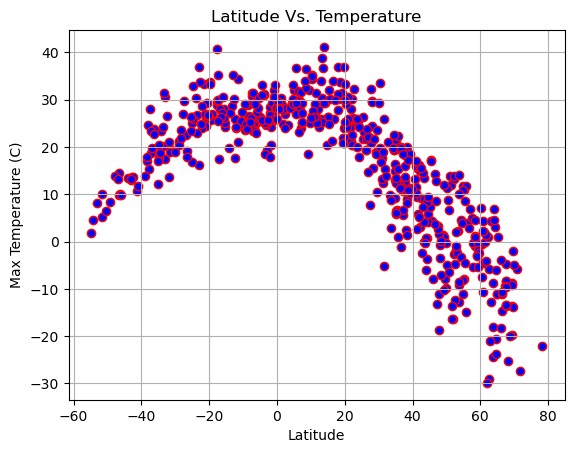

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='r')

# Incorporate the other graph properties
plt.grid()
plt.title('Latitude Vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

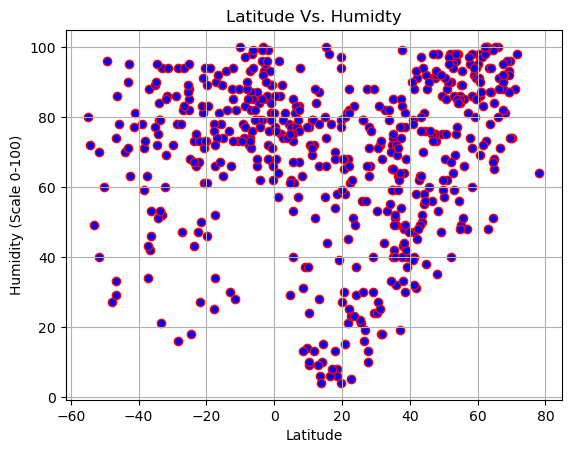

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', facecolors='b', edgecolors='r')

# Incorporate the other graph properties
plt.grid()
plt.title(f'Latitude Vs. Humidty')
plt.xlabel('Latitude')
plt.ylabel('Humidity (Scale 0-100)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

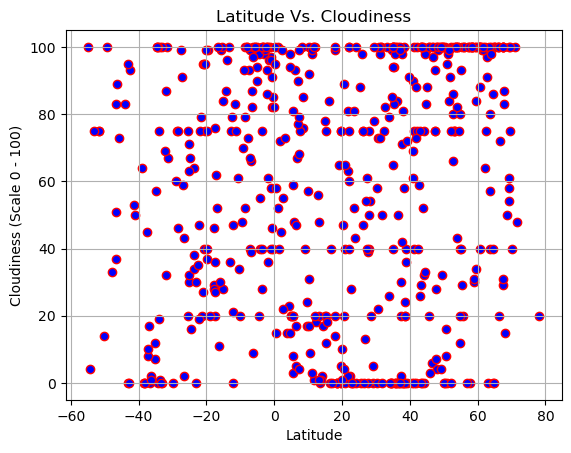

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', facecolors='b', edgecolors='r')

# Incorporate the other graph properties
plt.grid()
plt.title('Latitude Vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (Scale 0 - 100)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

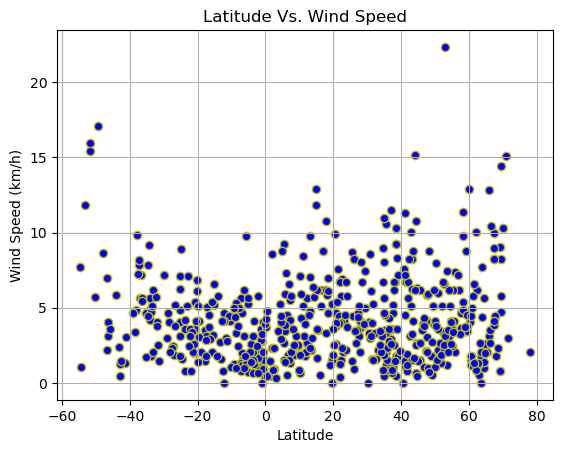

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', facecolors='b', edgecolors='y')

# Incorporate the other graph properties
plt.grid()
plt.title('Latitude Vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lr_func(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,color='r')
    print(f'Linear equation: {line_eq}')
    print(f'R squared: {rvalue**2}')

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,15.50,40,40,6.69,US,1710699276
4,iskateley,67.6803,53.1512,-8.32,92,87,4.47,RU,1710699461
7,jining,35.4050,116.5814,6.60,42,94,3.52,CN,1710699463
8,tura,25.5198,90.2201,21.63,21,0,1.44,IN,1710699464
9,olonkinbyen,70.9221,-8.7187,-5.90,88,100,15.12,SJ,1710699238


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,31.98,89,46,4.02,EC,1710699337
2,ushuaia,-54.8000,-68.3000,1.81,80,100,7.72,AR,1710699278
3,invercargill,-46.4000,168.3500,10.01,86,89,4.02,NZ,1710699460
5,tolanaro,-25.0319,46.9987,26.29,85,71,6.25,MG,1710699462
6,blackmans bay,-43.0167,147.3167,13.07,90,0,0.45,AU,1710699247


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.69x + 36.94
R squared: 0.7724133635862287


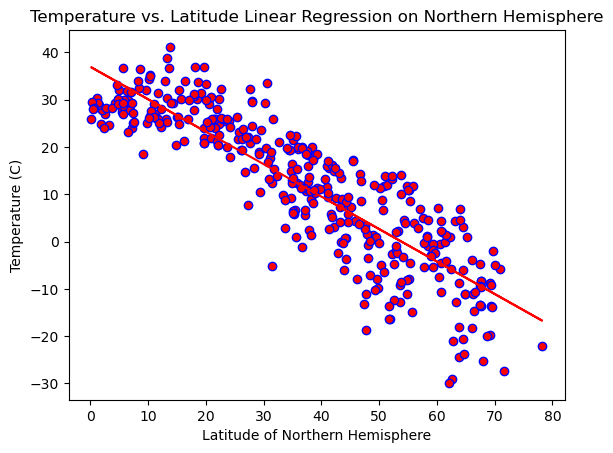

In [16]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='r', edgecolors='b')
plt.title("Temperature vs. Latitude Linear Regression on Northern Hemisphere")
plt.xlabel("Latitude of Northern Hemisphere")
plt.ylabel("Temperature (C)")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

lr_func(x,y)
plt.show()

Linear equation: y = 0.32x + 30.25
R squared: 0.47251675230214263


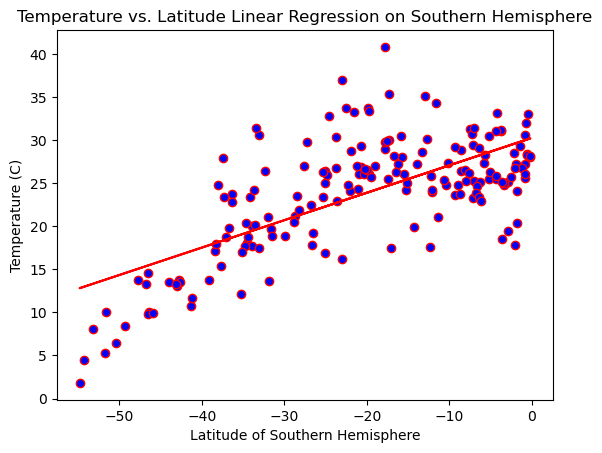

In [17]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='r')
plt.title("Temperature vs. Latitude Linear Regression on Southern Hemisphere")
plt.xlabel("Latitude of Southern Hemisphere")
plt.ylabel("Temperature (C)")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

lr_func(x,y)
plt.show()

**Discussion about the linear relationship:** there is not a relationship between latitude and temp with there being a positive correlation in southern hemisphere and negative in northern. When looking at r squared values, we see that northern hemisphere data fits the line better.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.48x + 49.22
R squared: 0.14654611185755867


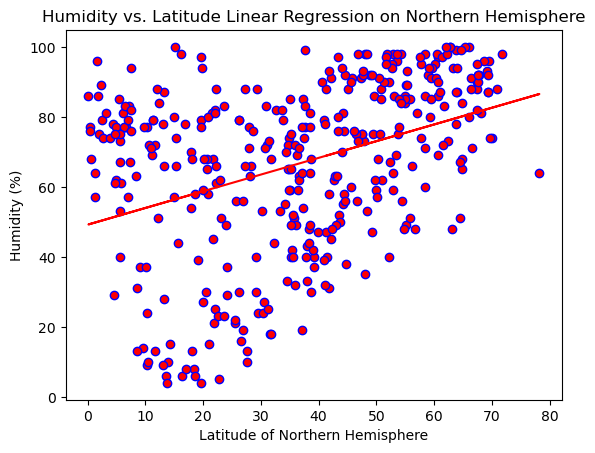

In [18]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='r', edgecolors='b')
plt.title("Humidity vs. Latitude Linear Regression on Northern Hemisphere")
plt.xlabel("Latitude of Northern Hemisphere")
plt.ylabel("Humidity (%)")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

lr_func(x,y)
plt.show()

Linear equation: y = 0.39x + 82.22
R squared: 0.09720318205561211


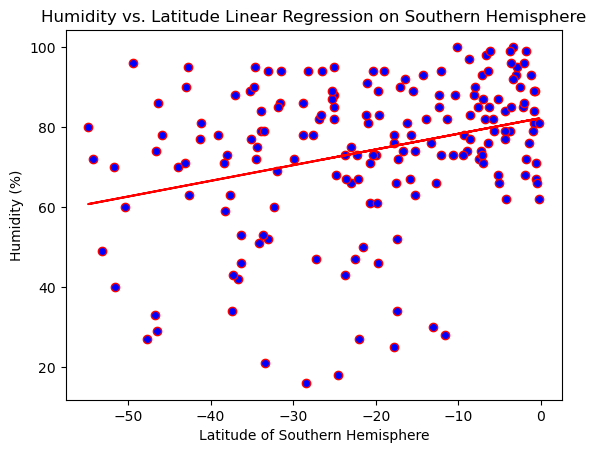

In [19]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='r')
plt.title("Humidity vs. Latitude Linear Regression on Southern Hemisphere")
plt.xlabel("Latitude of Southern Hemisphere")
plt.ylabel("Humidity (%)")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

lr_func(x,y)
plt.show()

**Discussion about the linear relationship:** the spread out data tells me that there isn't a connnection between cloudiness and latitude


### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.5x + 38.61
R squared: 0.06605494782137492


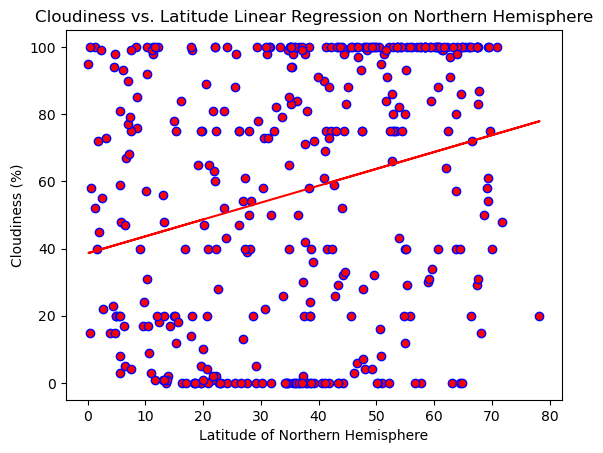

In [20]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='r', edgecolors='b')
plt.title("Cloudiness vs. Latitude Linear Regression on Northern Hemisphere")
plt.xlabel("Latitude of Northern Hemisphere")
plt.ylabel("Cloudiness (%)")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

lr_func(x,y)
plt.show()

Linear equation: y = 0.71x + 74.01
R squared: 0.09436051606552921


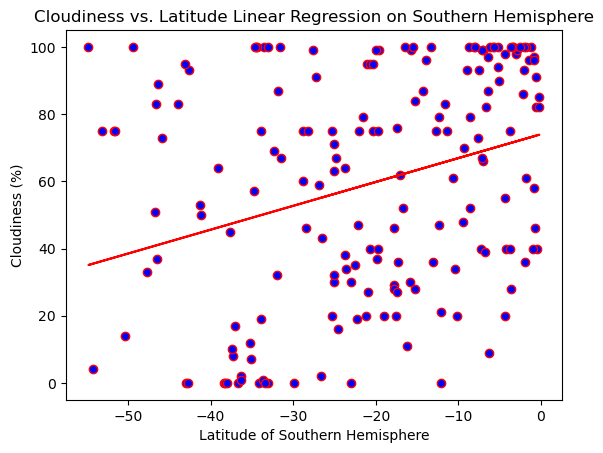

In [21]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='r')
plt.title("Cloudiness vs. Latitude Linear Regression on Southern Hemisphere")
plt.xlabel("Latitude of Southern Hemisphere")
plt.ylabel("Cloudiness (%)")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

lr_func(x,y)
plt.show()

**Discussion about the linear relationship:** The spread out data points and very low R squared values show me that there isn't a connection between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.02x + 3.75
R squared: 0.009974615742209352


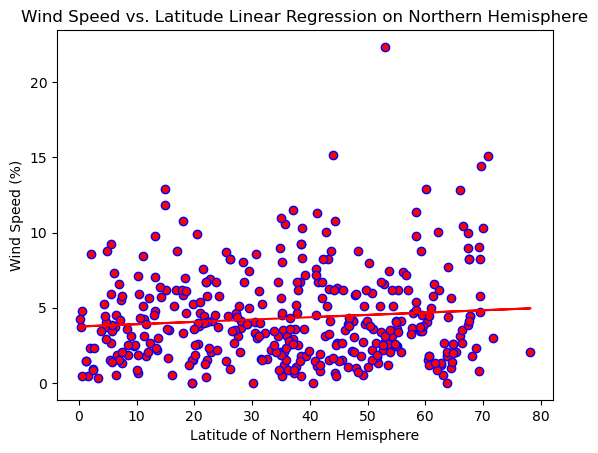

In [24]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='r', edgecolors='b')
plt.title("Wind Speed vs. Latitude Linear Regression on Northern Hemisphere")
plt.xlabel("Latitude of Northern Hemisphere")
plt.ylabel("Wind Speed (%)")

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

lr_func(x,y)
plt.show()

Linear equation: y = -0.09x + 2.04
R squared: 0.2164466154497941


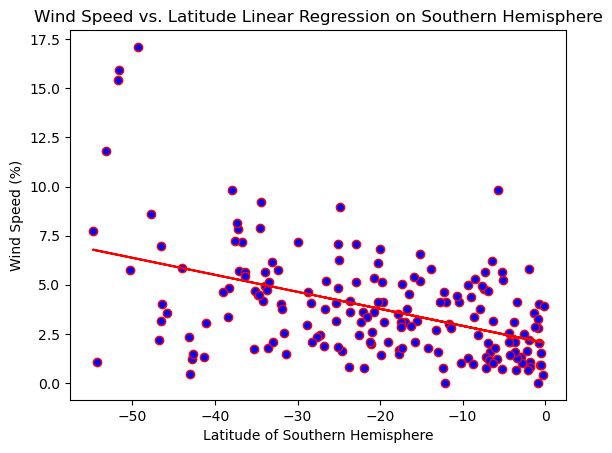

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='r')
plt.title("Wind Speed vs. Latitude Linear Regression on Southern Hemisphere")
plt.xlabel("Latitude of Southern Hemisphere")
plt.ylabel("Wind Speed (%)")

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

lr_func(x,y)
plt.show()

**Discussion about the linear relationship:**  The data points are too spread out, so I would say there is not relationship between Wind Speed and Latitude